In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
plt.style.use("ggplot")

In [2]:
import os  # Import the os module

# Change the working directory to the desired folder
os.chdir(r"C:\Users\shree\OneDrive\Desktop\Project_Exhibhition\Data")
print(os.getcwd())  # Confirm the new working directory

# Now you can load your file without specifying the full path
import pandas as pd
df = pd.read_csv("Crop_Yield.csv")
print(df.head())  # Display the first few rows of the DataFrame


C:\Users\shree\OneDrive\Desktop\Project_Exhibhition\Data
           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  


In [3]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True, errors='ignore')


In [5]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [7]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop_duplicates(inplace=True)


In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(19689, 10)

In [12]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [13]:
# Make sure columns are of numeric types (e.g., float or int)
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix for the numeric columns
numeric_df.corr()



,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,1.000000,-0.035686,0.003366,-0.011187,0.011169,-0.004657,0.002539
Area,-0.035686,1.000000,0.037441,-0.106054,0.973255,0.973479,0.001858
Production,0.003366,0.037441,1.000000,0.029879,0.039799,0.035171,0.570809
Annual_Rainfall,-0.011187,-0.106054,0.029879,1.000000,-0.109734,-0.097657,0.020761
Fertilizer,0.011169,0.973255,0.039799,-0.109734,1.000000,0.954991,0.002862
Pesticide,-0.004657,0.973479,0.035171,-0.097657,0.954991,1.000000,0.001782
Yield,0.002539,0.001858,0.570809,0.020761,0.002862,0.001782,1.000000


In [14]:
len(df['Area'].unique())

13644

In [15]:
# Display column names
print("Columns in DataFrame:", df.columns)

# Replace 'Item' with the actual column of interest
if 'Crop' in df.columns:
    print("Unique values in 'Crop':", len(df['Crop'].unique()))
else:
    print("'Crop' column not found.")


Columns in DataFrame: Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')
Unique values in 'Crop': 55


In [16]:
(df['Area'].value_counts() <400).sum()

13644

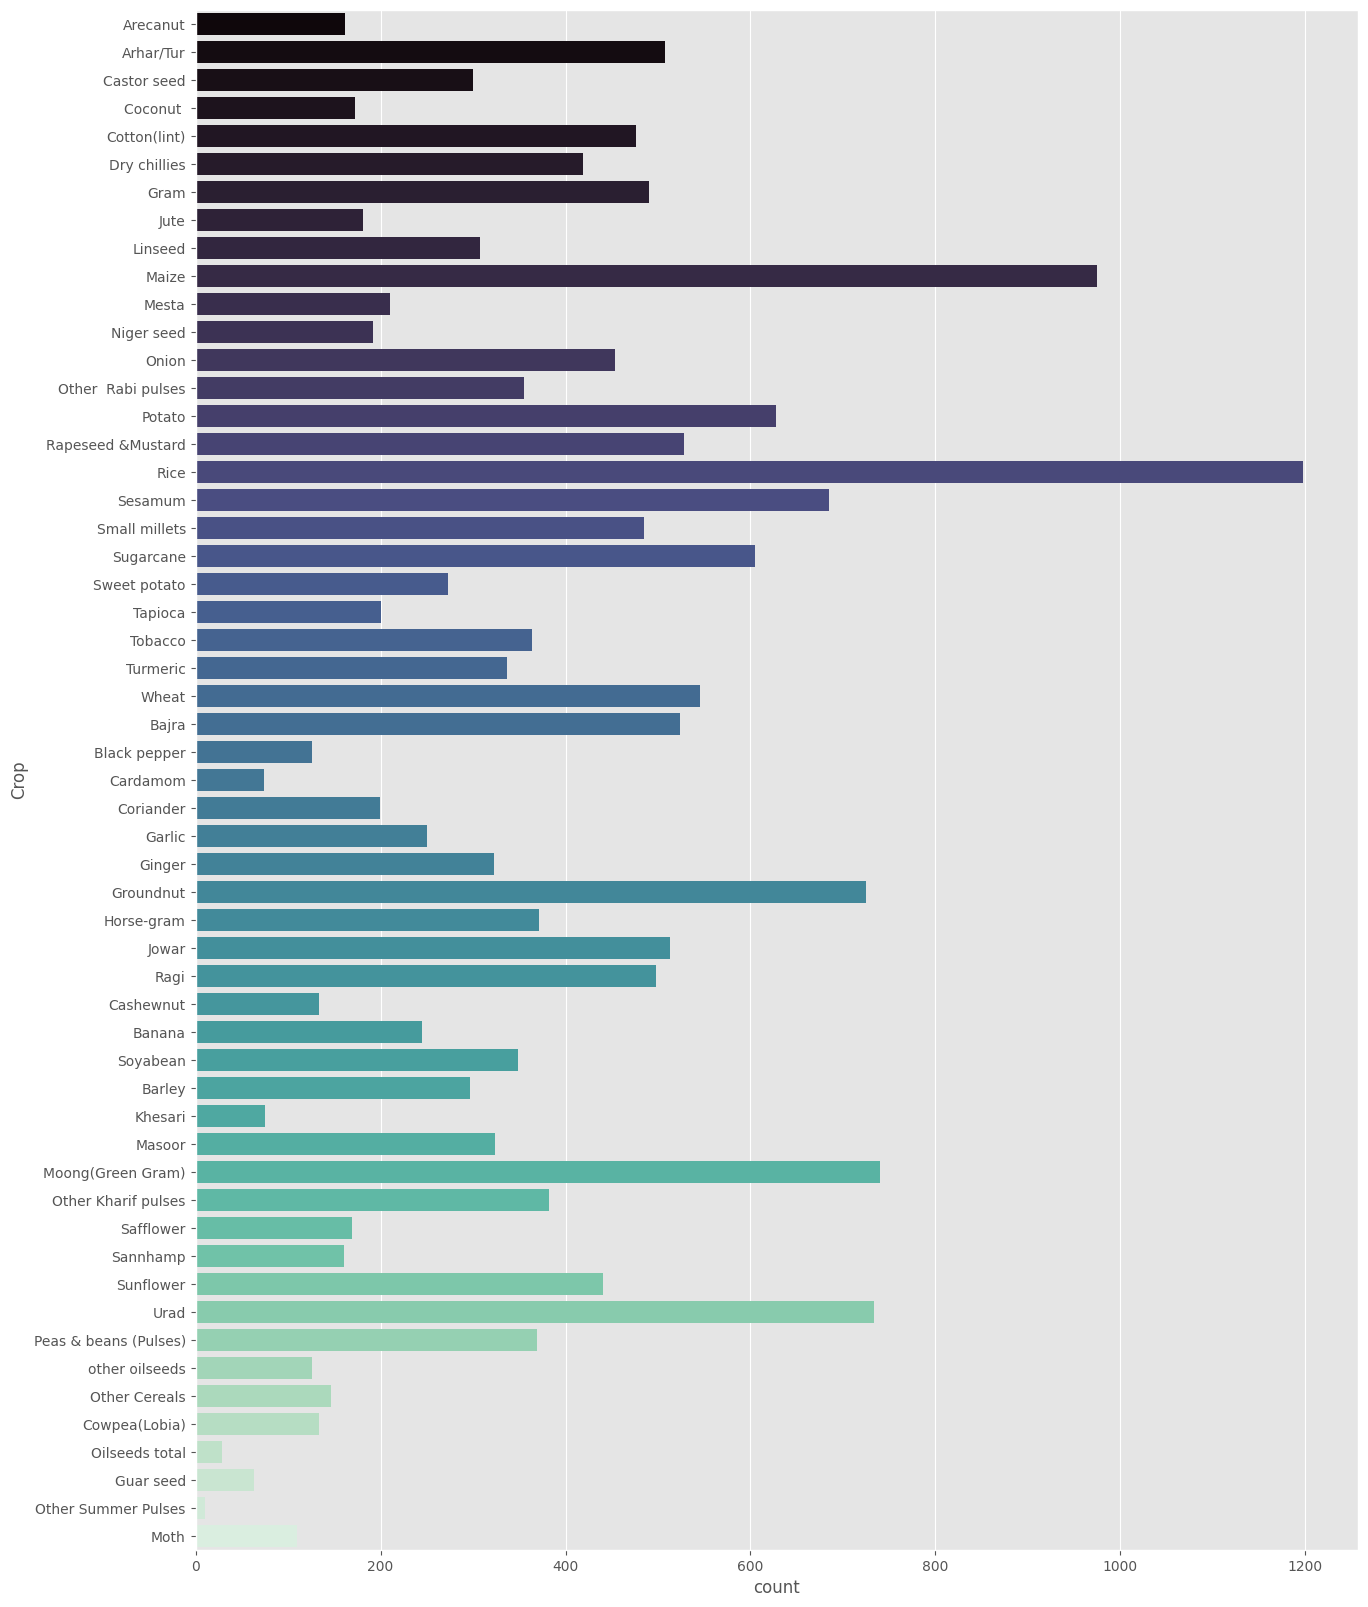

In [24]:
plt.figure(figsize=(15,20))
sns.countplot(
    y=df['Crop'], 
    hue=df['Crop'],  # Set the 'Item' variable as hue
    palette="mako",  # Use a different palette
)

plt.show()

In [20]:
# Check if 'Yield' column exists in the DataFrame
if 'Yield' in df.columns:
    # Group by 'State' and sum the 'Yield' values
    yield_per_state = df.groupby('State')['Yield'].sum().reset_index()

    # Display the result
    print(yield_per_state)
else:
    print("'Yield' column not found in DataFrame. Available columns are:", df.columns)


                State          Yield
0      Andhra Pradesh  229735.184723
1   Arunachal Pradesh    1090.637612
2               Assam  160612.648362
3               Bihar    3114.942771
4        Chhattisgarh    1799.560319
5               Delhi    2663.090000
6                 Goa   87275.955000
7             Gujarat    5471.634563
8             Haryana    3491.154048
9    Himachal Pradesh    1170.089832
10  Jammu and Kashmir     825.380224
11          Jharkhand     974.625173
12          Karnataka  151391.867808
13             Kerala  147710.353263
14     Madhya Pradesh    2921.854255
15        Maharashtra    3388.793109
16            Manipur    2316.347595
17          Meghalaya    1868.333574
18            Mizoram    1068.805857
19           Nagaland    2344.345829
20             Odisha    2387.350672
21         Puducherry  232163.600840
22             Punjab    1926.568436
23             Sikkim     278.625476
24         Tamil Nadu  185813.281648
25          Telangana   39508.727733
2

In [21]:
df['Yield'].sum()

1574214.485762277

In [22]:
yield_per_state

,State,Yield
0,Andhra Pradesh,229735.184723
1,Arunachal Pradesh,1090.637612
2,Assam,160612.648362
3,Bihar,3114.942771
4,Chhattisgarh,1799.560319
5,Delhi,2663.090000
6,Goa,87275.955000
7,Gujarat,5471.634563
8,Haryana,3491.154048
9,Himachal Pradesh,1170.089832


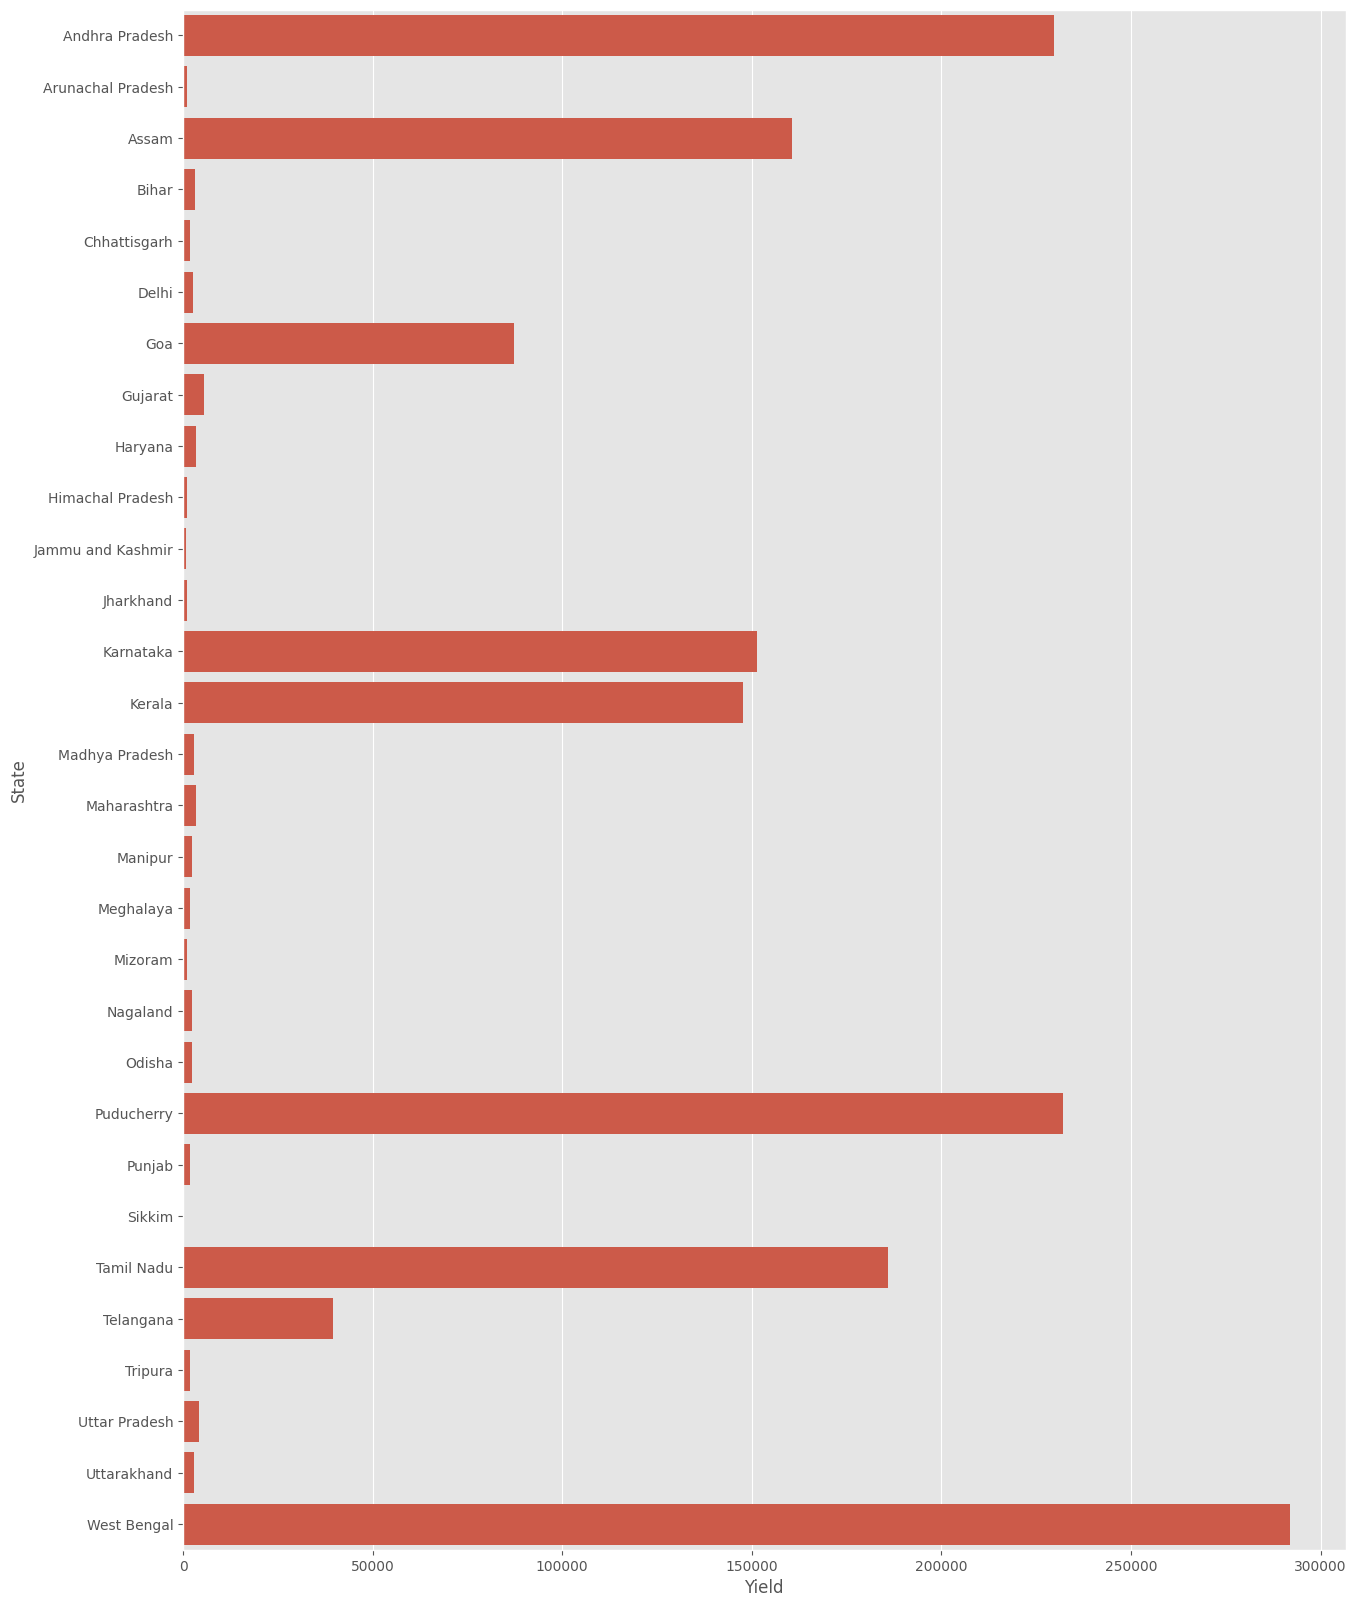

In [23]:
plt.figure(figsize=(15, 20))
sns.barplot(y='State', x='Yield', data=yield_per_state)
plt.show()
